In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

def conv(s):
    idx = -1
    for i,c in enumerate(s):
        if c!='.' and not c.isnumeric():
            idx = i
            break
#     print(s[idx])
    unit = s[idx:].strip()
    num = float(s[:idx])
    if unit =='s':
        num=num*1000

    return num

def pt_values(yvals,ax,**kwargs):
    N = len(yvals)
    X2 = np.sort(yvals)
    F2 = np.array(np.arange(N))/float(N)
    
    s = kwargs.pop('start',0)
    e = kwargs.pop('end',1)
    
    start=int(len(F2)*s)
    end=int(len(F2)*e)
    
    xvals = X2[start:end]
    yvals = F2[start:end]
    ax.plot(xvals,yvals,**kwargs)
    
def pt(fn, ax, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    yvals = df['float_lat'].to_numpy()
    pt_values(yvals, ax, **kwargs)
    
def get_box(fn, **kwargs):
    df = pd.read_csv(fn, header=None)
    df['float_lat'] = df[0].apply(conv)
    return df['float_lat']

    

(0.0, 1.0)

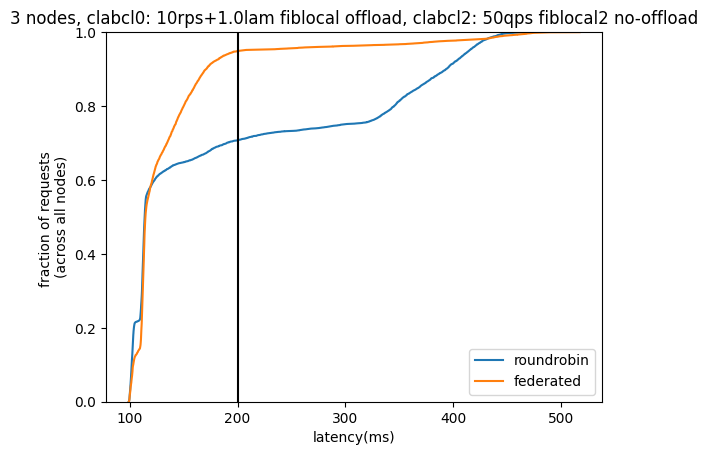

In [6]:
fig, ax = plt.subplots()
pols = ['roundrobin','federated']
# pols = ['base']

for pol in pols:
    total = []
    # for i in range(5,6):
    #     box = get_box(f'../feodata/cluster_exp_fiblocal_p52_multiskew_policy_{pol}/run_load/{pol}/clabcl{i}/fiblocal2-profile52-p2p20ms.out')
    #     total = np.concatenate((total, box.iloc[len(box)//10:]))
    # for i in range(5,6):
    box = get_box(f'./microbenchmark-data/3node/1node_10rps_1.0lam_1node_50qps/{pol}_fiblocal.out')
    total = np.concatenate((total, box))

    box = get_box(f'./microbenchmark-data/3node/1node_10rps_1.0lam_1node_50qps/{pol}_fiblocal2.out')
    total = np.concatenate((total, box))
    
    pt_values(total, ax)

ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_title('3 nodes, clabcl0: 10rps+1.0lam fiblocal offload, clabcl2: 50qps fiblocal2 no-offload')
ax.set_ylim(0,1)

(0.0, 1.0)

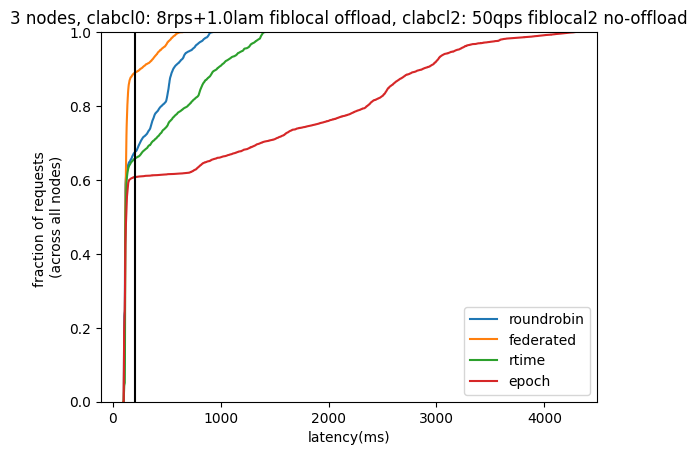

In [7]:
fig, ax = plt.subplots()
pols = ['roundrobin','federated', 'rtime', 'epoch']
# pols = ['base']

for pol in pols:
    total = []
    # for i in range(5,6):
    #     box = get_box(f'../feodata/cluster_exp_fiblocal_p52_multiskew_policy_{pol}/run_load/{pol}/clabcl{i}/fiblocal2-profile52-p2p20ms.out')
    #     total = np.concatenate((total, box.iloc[len(box)//10:]))
    # for i in range(5,6):
    box = get_box(f'./microbenchmark-data/3node/1node_8rps_1.0lam_1node_50qps/{pol}_fiblocal.out')
    total = np.concatenate((total, box))

    box = get_box(f'./microbenchmark-data/3node/1node_8rps_1.0lam_1node_50qps/{pol}_fiblocal2.out')
    total = np.concatenate((total, box))
    
    pt_values(total, ax)

ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_title('3 nodes, clabcl0: 8rps+1.0lam fiblocal offload, clabcl2: 50qps fiblocal2 no-offload')
ax.set_ylim(0,1)
# ax.set_xlim(0, 500)

-----
roundrobin
114.68227
329.80436720000006
569.9309950800002
-----
federated
113.321615
151.68190660000002
212.33214471999997
-----
roundrobinlatency
124.831897
924.3009368000002
1927.2240138999925
-----
base
564.60326
1853.9168740000007
2372.9391255200003
-----
epoch
113.84945
206.8340052
446.2776697999998


(0.0, 250.0)

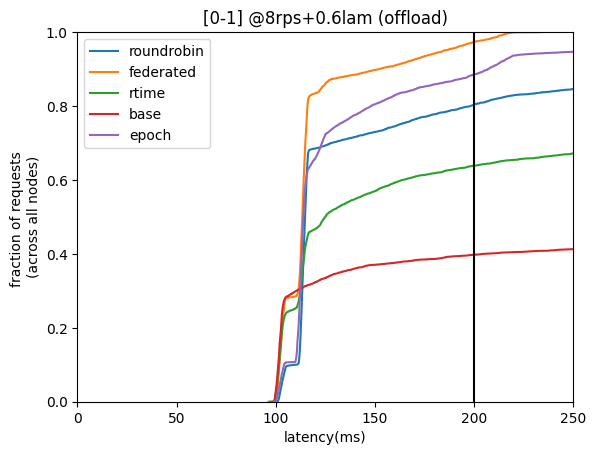

In [8]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
pols = ['roundrobin','federated', 'roundrobinlatency', 'base', 'epoch']
# pols = ['base']

for pol in pols:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'./microbenchmark-data/10node/2node_8rps_0.6lam/cluster_exp_fiblocal_p66_multiskew_policy_{pol}/run_load/{pol}/clabcl{i}/fiblocal-profile66-p2p20ms.out')
            total = np.concatenate((total, box))
    print('-----')
    print(pol)
    print(np.percentile(total, 50))
    print(np.percentile(total, 90))
    print(np.percentile(total, 99))
    pt_values(total, ax)

pols[2] = 'rtime'
ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_title('[0-1] @8rps+0.6lam (offload)')
ax.set_ylim(0,1)
ax.set_xlim(0, 250)

(0.0, 250.0)

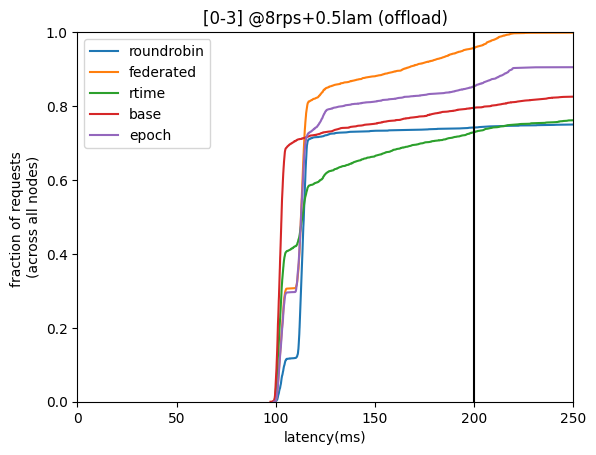

In [10]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
pols = ['roundrobin','federated', 'roundrobinlatency', 'base', 'epoch']
# pols = ['base']

for pol in pols:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'./microbenchmark-data/10node/4node_8rps_0.5lam/cluster_exp_fiblocal_p68_multiskew_policy_{pol}/run_load/{pol}/clabcl{i}/fiblocal-profile68-p2p20ms.out')
            total = np.concatenate((total, box))
    
    pt_values(total, ax)

pols[2] = 'rtime'
ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_title('[0-3] @8rps+0.5lam (offload)')
ax.set_ylim(0,1)
ax.set_xlim(0,250)

(0.0, 250.0)

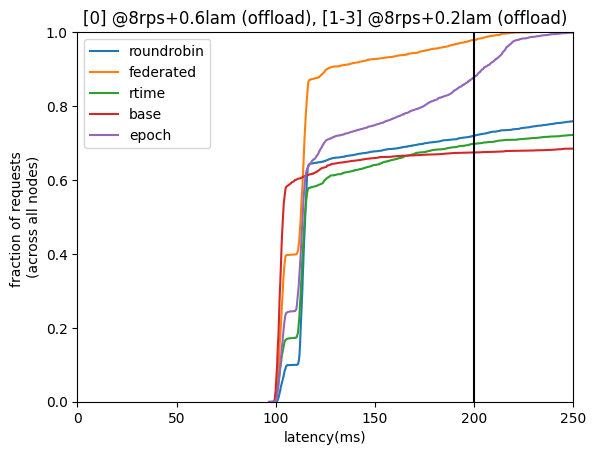

In [11]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
pols = ['roundrobin','federated', 'roundrobinlatency', 'base', 'epoch']
# pols = ['base']

for pol in pols:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'./microbenchmark-data/10node/1node_8rps_0.6lam_3node_8rps_0.2lam/cluster_exp_fiblocal_p70_multiskew_policy_{pol}/run_load/{pol}/clabcl{i}/fiblocal-profile70-p2p20ms.out')
            total = np.concatenate((total, box))
    
    pt_values(total, ax)

pols[2] = 'rtime'
ax.legend(pols)
ax.set_ylabel('fraction of requests \n(across all nodes)')
ax.set_xlabel('latency(ms)')
ax.axvline(x=200, color='black')
ax.set_title('[0] @8rps+0.6lam (offload), [1-3] @8rps+0.2lam (offload)')
ax.set_ylim(0,1)
ax.set_xlim(0,250)

(75.0, 275.0)

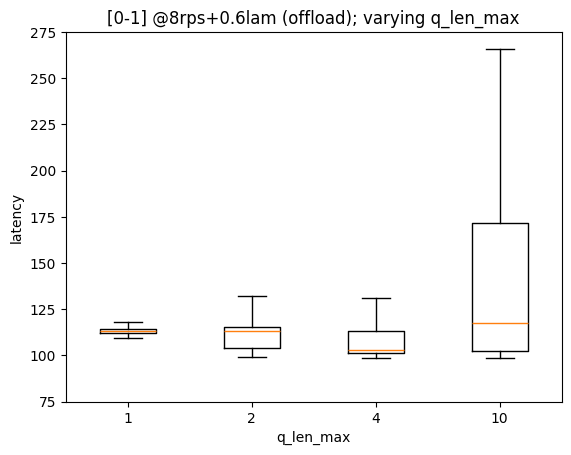

In [12]:
fig, ax = plt.subplots()
# pols = ['roundrobin','federated', 'roundrobinlatency']
# pols = ['base']
qlens = [1, 2, 4, 10]

percentiles = []

for qlen in qlens:
    total = []
    for i in range(0, 10):
        if i in [0,1]:
            box = get_box(f'./microbenchmark-data/10node/2node_8rps_0.6lam_qlen/cluster_exp_fiblocal_p66_multiskew_policy_federated_q{qlen}/run_load/federated/clabcl{i}/fiblocal-profile66-p2p20ms.out')
            total = np.concatenate((total, box))

    # case = []
    
    # case.append(np.percentile(total, 50))
    # case.append(np.percentile(total, 75))
    # case.append(np.percentile(total, 90))
    # case.append(np.percentile(total, 99))

    # percentiles.append(case)

    percentiles.append(total)
# for qlen in qlens:
    # plt.plot(percentiles)

ax.boxplot(percentiles, showfliers=False)

labels = []
for qlen in qlens:
    labels.append("q_len_max="+str(qlen))
# ax.legend(labels)
ax.set_ylabel('latency')
ax.set_xlabel('q_len_max')
ax.set_xticks([i for i in range(1,5)], qlens)
# ax.axvline(x=200, color='black')
ax.set_title('[0-1] @8rps+0.6lam (offload); varying q_len_max')
ax.set_ylim(75,275)
# ax.set_xlim(0,250)